In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os.path as osp

In [95]:
project_folder = '/data/shared/OCDDBSpred'
figure_folder = osp.join(project_folder, 'figures')

results_pattern = 'results_cv_classification_{}_{}_with_covariate_regr.csv'
metric_to_plot = 'AUC'
data_to_load = [('whole-brain', 'GMV'), ('whole-brain', 'WMV'), ('whole-brain', 'GMV+WMV'),
                ('ROI', 'NAc'), ('ROI', 'ATR'), ('ROI', 'NAc+ATR'), ('SclMom', 'GM+WM')]

ploting_labels = {'GMV': 'GM', 'WMV': 'WM', 'GMV+WMV': 'GM + WM', 'NAc': 'NAc', 
                  'ATR': 'ATR', 'NAc+ATR': 'NAc + ATR', 'GM+WM': 'Scalar\nMomentum'}

results_all = []
for data_scale, data_type in data_to_load:
    new_data_label = ploting_labels[data_type]
    df_results = pd.read_csv(results_pattern.format(data_type, data_scale))
    df_results = df_results[[metric_to_plot]]
    df_results['data'] = new_data_label
    results_all.append(df_results)

df_results_all = pd.concat(results_all, axis=0, ignore_index=True)

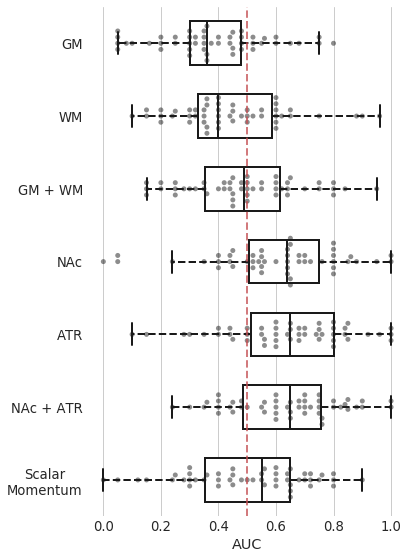

In [130]:
sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 8))
ax.axvline(0.5, 0, 1, lw=2, ls='--', c='r', alpha=0.75, zorder=3)
sns.boxplot(x='AUC', y='data', data=df_results_all, ax=ax, showfliers=False, color='w',
            linewidth=2, whiskerprops={'color': 'k', 'ls': '--'}, width=0.6,
            capprops={'color': 'k'}, medianprops={'color': 'k'}, boxprops={'edgecolor': 'k'},
            zorder=2)
sns.swarmplot(x='AUC', y='data', data=df_results_all, ax=ax, dodge=True, 
              color='k', alpha=0.5, zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel('')
ax.tick_params(axis='both', which='both', length=0)
ax.set_yticklabels(ax.get_yticklabels(), ma='center', ha='right')
sns.despine(trim=False, left=True, bottom=True)
fig.tight_layout()
fig.savefig(osp.join(figure_folder, 'figure2_classification_performance_auc.png'))
fig.savefig(osp.join(figure_folder, 'figure2_classification_performance_auc.pdf'))